# Evaluación

### Regresión

In [1]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

In [2]:
data=load_diabetes()

In [3]:
X_train, X_test, y_train, y_test = tts(data.data, data.target)

In [4]:
rf=RFR()
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

In [7]:
y_test[:10]

array([321., 124., 131.,  75., 230., 235.,  90., 283., 235., 132.])

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [6]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

3858.7205324324327

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [8]:
mse(y_test, y_pred)**0.5

62.118600535044514

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [10]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred)**0.5

0.45705457134671795

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [11]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

51.946396396396395

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [12]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.47405361679229285

In [14]:
rf.score(X_test, y_test)

0.4740536167922929

### Clasificación

In [82]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [83]:
svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [84]:
y_test[:10]

array([2, 1, 2, 1, 1, 2, 0, 2, 2, 1])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![](data/f1.png)

##### Accuracy

In [17]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.8222222222222222

In [18]:
svc.score(X_test, y_test)

0.8222222222222222

##### Precision

In [21]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.7896613190730838

##### Recall

In [22]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.8011695906432749

##### F1_Score

In [23]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.7925925925925926

##### Matriz de Confusión

![](data/conf_matrix.jpeg)

In [25]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[17,  0,  0],
       [ 0, 14,  5],
       [ 0,  3,  6]])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

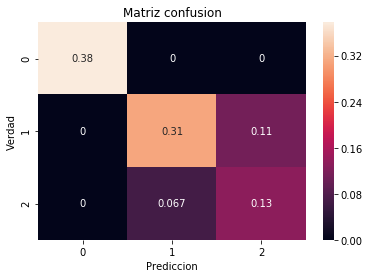

In [29]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![](data/roc.png)

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test) # predice etiqueta

y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve la prob

In [34]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

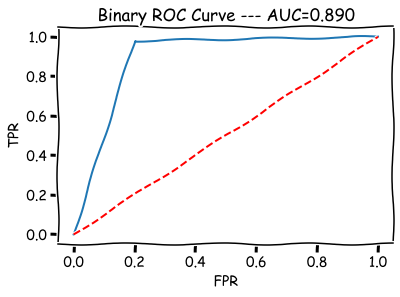

In [35]:
with plt.xkcd():  # mal pintao, y_pred
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

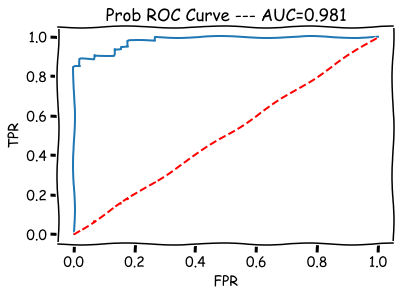

In [38]:
with plt.xkcd(): # bien pintá, y_prob
    fpr, tpr, umbrales=roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Prob ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

In [43]:
acc(y_test, y_pred)  # accuracy

0.9230769230769231

In [44]:
umbrales

array([1.98338450e+00, 9.83384500e-01, 8.39905515e-01, 8.33265612e-01,
       7.83600402e-01, 7.61561324e-01, 7.21511670e-01, 6.82231256e-01,
       6.15031911e-01, 5.82777871e-01, 5.55963548e-01, 5.00000000e-01,
       4.72279421e-01, 3.20793922e-01, 2.86102865e-01, 3.89090240e-04])

In [91]:
df=pd.DataFrame()

df['real']=y_test
df['prediccion']=y_pred

df.head()

,real,prediccion
0,2,1
1,1,1
2,2,1
3,1,1
4,1,1


# HyperOpt (GridSearching bayesiano)

In [45]:
#!pip3 install hyperopt


import pandas as pd
import xgboost as xgb

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

In [46]:
df=pd.read_csv('data/diamonds_train.csv')
df=df.dropna()

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [47]:
X=df.drop('price', axis=1)
y=df.price

In [48]:
clarity={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4,
         'VVS2':5, 'VVS1':6, 'IF':7}


cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}


color={'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}

In [49]:
def label(s, dic):
    return dic[s]

In [50]:
X.clarity=X.clarity.apply(lambda x: label(x, clarity))

X.cut=X.cut.apply(lambda x: label(x, cut))

X.color=X.color.apply(lambda x: label(x, color))

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.21,3,0,3,62.4,58.0,6.83,6.79,4.25
1,0.32,2,2,3,63.0,57.0,4.35,4.38,2.75
2,0.71,0,3,4,65.5,55.0,5.62,5.53,3.65
3,0.41,1,6,2,63.8,56.0,4.68,4.72,3.00
4,1.02,4,3,2,60.5,59.0,6.55,6.51,3.95


In [51]:
X_train, X_test, y_train, y_test = tts(X, y)

In [52]:
space={
    'n_estimators':hp.quniform('n_estimators', 10, 1000, 25),
    
    'learning_rate':hp.uniform('learning_rate', 0.0001, 1.0),
    
    'max_depth':hp.quniform('x_max_depth', 4, 16, 1),
    
    'min_child_weight':hp.quniform('x_min_child', 1, 10, 1),
    
    'subsample':hp.uniform('x_subsample', 0.7, 1),
    
    'gamma':hp.uniform('x_gamma', 0.1, 0.5),
    
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1)
}

In [53]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(
        n_estimators=int(space['n_estimators']),
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        min_child_weight=space['min_child_weight'],
        subsample=space['subsample'],
        gamma=space['gamma'],
        reg_lambda=space['reg_lambda'],
        objective='reg:squarederror'
    )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss':rmse, 'status':STATUS_OK}

In [54]:
trials_reg=Trials()

best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

best

100%|██████████| 10/10 [04:39<00:00, 27.92s/it, best loss: 540.8825001459674]


{'learning_rate': 0.09731207050419076,
 'n_estimators': 575.0,
 'x_gamma': 0.3215276842561301,
 'x_max_depth': 4.0,
 'x_min_child': 7.0,
 'x_reg_lambda': 0.6563701833874768,
 'x_subsample': 0.9935127676771988}

In [55]:
modelo=xgb.XGBRegressor(
    n_estimators=int(best['n_estimators']),
    learning_rate=best['learning_rate'],
    x_max_depth=int(best['x_max_depth']),
    x_min_child=best['x_min_child'],
    x_subsample=best['x_subsample'],
    x_gamma=best['x_gamma'],
    x_reg_lambda=best['x_reg_lambda'],
    objective='reg:squarederror'
    )

In [56]:
modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
mse(y_test, y_pred)**0.5

556.4552691240643

In [57]:
m=xgb.XGBRegressor()
m.fit(X_train, y_train)
y_pred=m.predict(X_test)
mse(y_test, y_pred)**0.5

[12:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


622.8651549377946

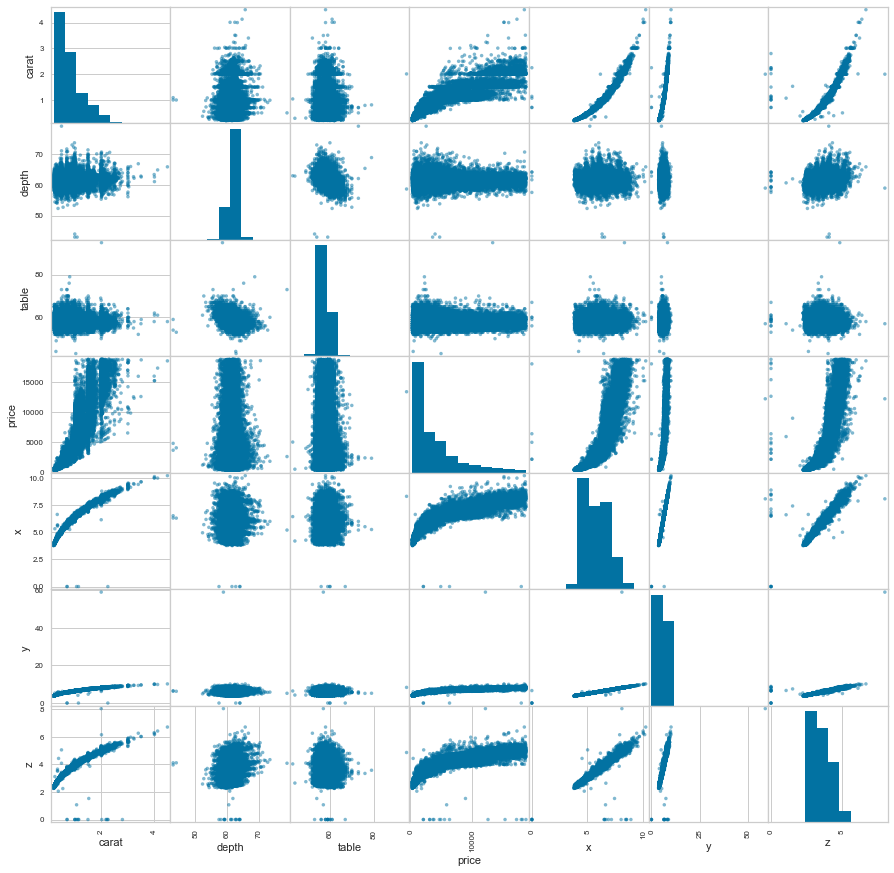

In [80]:
from pandas.plotting import scatter_matrix


scatter_matrix(df, figsize=(15, 15));

# PyCaret

https://pycaret.org/tutorial/

https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL#scrollTo=lUvE187JEQm3

In [58]:
#!pip3 install pycaret

from pycaret.datasets import get_data
dataset=get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [59]:
dataset.shape

(24000, 24)

In [60]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [61]:
from pycaret.classification import *

In [62]:
exp_clf101 = setup(data = data, target = 'default', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.8236,0,0.3646,0.6932,0.4776,0.3836
1,Linear Discriminant Analysis,0.8236,0.7703,0.3813,0.6818,0.4888,0.3923
2,Gradient Boosting Classifier,0.8225,0.7887,0.3649,0.687,0.4763,0.3813
3,Extreme Gradient Boosting,0.8218,0.7894,0.3595,0.6862,0.4715,0.3767
4,Light Gradient Boosting Machine,0.8214,0.7859,0.3878,0.6663,0.49,0.3908
5,CatBoost Classifier,0.8211,0.787,0.3856,0.6656,0.488,0.3888
6,Ada Boost Classifier,0.8185,0.7783,0.3507,0.6729,0.4607,0.3644
7,Extra Trees Classifier,0.8093,0.7533,0.3839,0.61,0.4711,0.362
8,Random Forest Classifier,0.8084,0.738,0.3337,0.6254,0.4349,0.3323
9,Quadratic Discriminant Analysis,0.7892,0.7391,0.1731,0.6275,0.2376,0.1696


In [64]:
dt = create_model('dt')
print (dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7325,0.6213,0.4221,0.4005,0.4110,0.2381
1,0.7237,0.6199,0.4306,0.3878,0.4081,0.2285
2,0.7400,0.6361,0.4504,0.4184,0.4338,0.2654
3,0.7155,0.5984,0.3853,0.3646,0.3747,0.1907
4,0.7375,0.6175,0.4023,0.4057,0.4040,0.2356
5,0.7356,0.6376,0.4618,0.4127,0.4358,0.2639
6,0.7237,0.6210,0.4363,0.3889,0.4112,0.2315
7,0.7387,0.6365,0.4533,0.4167,0.4342,0.2647
8,0.7262,0.6062,0.3909,0.3833,0.3871,0.2108
9,0.7210,0.6030,0.3881,0.3743,0.3811,0.2011


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [65]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7406,0.5879,0.1671,0.3296,0.2218,0.0857
1,0.7350,0.5787,0.1473,0.2989,0.1973,0.0601
2,0.7632,0.6648,0.2096,0.4277,0.2814,0.1590
3,0.7462,0.5984,0.1530,0.3375,0.2105,0.0842
4,0.7550,0.6098,0.2040,0.3956,0.2692,0.1397
5,0.7613,0.6203,0.1870,0.4125,0.2573,0.1384
6,0.7412,0.5883,0.1671,0.3315,0.2222,0.0868
7,0.7594,0.6139,0.1898,0.4061,0.2587,0.1371
8,0.7487,0.6100,0.1898,0.3681,0.2505,0.1177
9,0.7542,0.6264,0.1870,0.3860,0.2519,0.1256


In [66]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8064,0.7435,0.3229,0.6196,0.4246,0.3218
1,0.8076,0.7488,0.3314,0.6223,0.4325,0.3295
2,0.8170,0.7576,0.3683,0.6533,0.4710,0.3707
3,0.8139,0.7175,0.3513,0.6458,0.4550,0.3544
4,0.8026,0.7199,0.2890,0.6145,0.3931,0.2930
5,0.8114,0.7446,0.3569,0.6300,0.4557,0.3520
6,0.8008,0.7286,0.3258,0.5897,0.4197,0.3113
7,0.8070,0.7502,0.3144,0.6271,0.4189,0.3181
8,0.8114,0.7262,0.3371,0.6398,0.4416,0.3410
9,0.8063,0.7428,0.3399,0.6122,0.4372,0.3315


In [67]:
tuned_dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8264,0.7219,0.3201,0.7533,0.4493,0.3656
1,0.8239,0.7259,0.3059,0.7500,0.4346,0.3515
2,0.8158,0.7548,0.2946,0.6980,0.4143,0.3258
3,0.8208,0.7171,0.3173,0.7134,0.4392,0.3508
4,0.8133,0.7178,0.3173,0.6627,0.4291,0.3337
5,0.8239,0.7359,0.3003,0.7571,0.4300,0.3481
6,0.8164,0.7197,0.2975,0.7000,0.4175,0.3290
7,0.8264,0.7408,0.3031,0.7754,0.4358,0.3557
8,0.8214,0.7158,0.3003,0.7361,0.4266,0.3423
9,0.8107,0.7322,0.3003,0.6584,0.4125,0.3179


In [68]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8289,0.7871,0.3484,0.7410,0.4740,0.3873
1,0.8227,0.7990,0.3513,0.6966,0.4670,0.3743
2,0.8221,0.8251,0.3824,0.6716,0.4874,0.3894
3,0.8227,0.7740,0.3626,0.6882,0.4750,0.3804
4,0.8227,0.7795,0.3513,0.6966,0.4670,0.3743
5,0.8239,0.7918,0.3598,0.6978,0.4748,0.3817
6,0.8202,0.7536,0.3343,0.6941,0.4512,0.3591
7,0.8302,0.7935,0.3569,0.7412,0.4818,0.3948
8,0.8214,0.7649,0.3541,0.6868,0.4673,0.3729
9,0.8138,0.7824,0.3598,0.6414,0.4610,0.3590


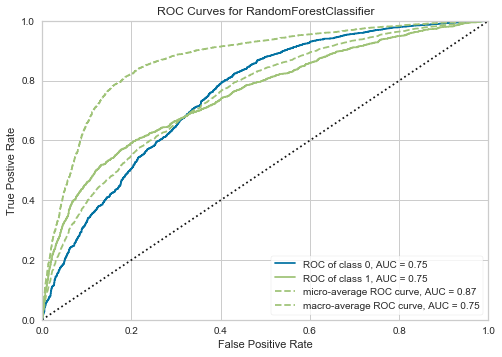

In [69]:
plot_model(tuned_rf, plot = 'auc')

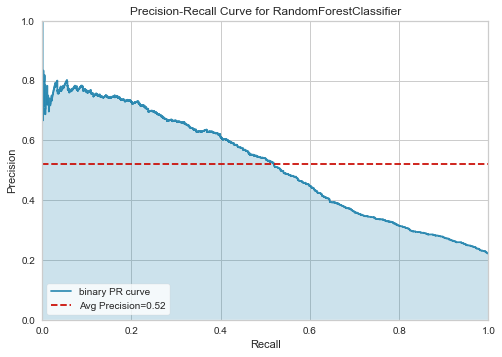

In [70]:
plot_model(tuned_rf, plot = 'pr')

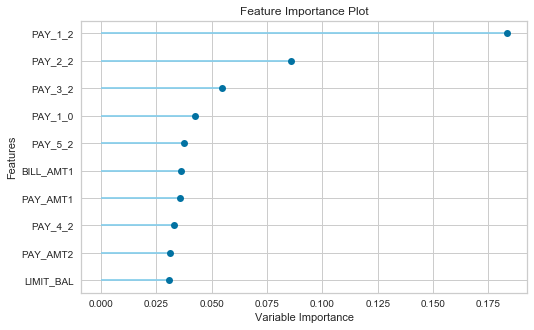

In [71]:
plot_model(tuned_rf, plot='feature')

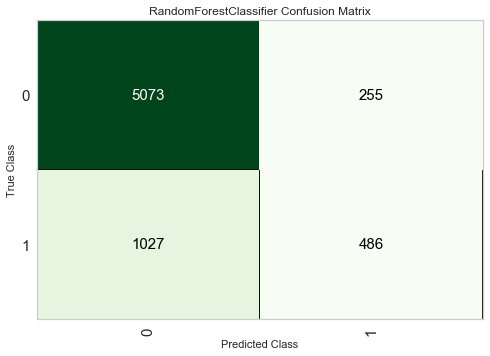

In [72]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [73]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8126,0.7538,0.3212,0.6559,0.4312,0.3345


In [74]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [75]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8361,0.8189,0.3681,0.7715,0.4984,0.4148
